# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using OLS and LAD cost functions.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.




#### Before you start recall that

L1 loss function (sum of magnitudes, used for LAD model):

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

L2 loss function (RSS, residual sum of squares, used for OLS model):

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$

## Global Toolbox

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
%matplotlib inline

## Part 1: OLS Regression
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. 

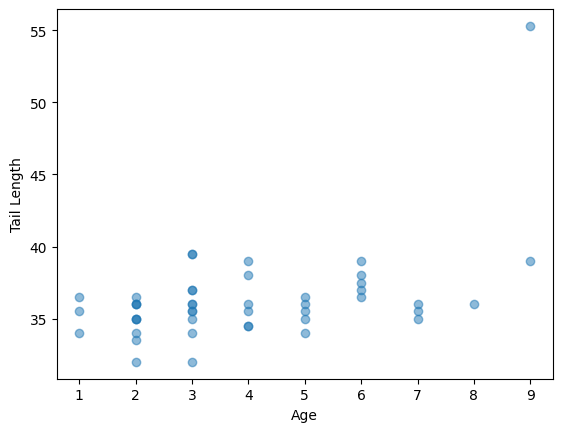

In [6]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv') 

# Make the scatter plot (don't forget the axis labels)
plt.scatter(possum_data['age'], possum_data['tailL'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Tail Length')
plt.show()

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [7]:
def linearModelPredict(b,X):
    yp = X @ b
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

yp = linearModelPredict(b, X)
print(yp)


# By the way: What happens when b is a 2d-array?
# When b is a 2D-array of dimensions m x n, where m is the number of coefficients for the model
# and N is the number of inputs,
# the output is an N x n matrix, where each column contains the predictions when using one of the n
# different sets of coefficients in b

b2 = np.array([[0.1, -0.1], [0.3, -0.3]])
yp2 = linearModelPredict(b2, X)
print(yp2)



[ 0.1 -0.2  0.7]
[[ 0.1 -0.1]
 [-0.2  0.2]
 [ 0.7 -0.7]]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [8]:
def linearModelLossRSS(b,X,y):
    yp = linearModelPredict(b, X)
    residual = y - yp
    residual_sum_of_squares = np.dot(residual, residual)
    gradient = -2 * residual @ X
    return (residual_sum_of_squares, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

print(linearModelLossRSS(b, X, y))

(2.06, array([-3.6, -4. ]))


**Answer:** In general, the parameter's value should be increased when the gradient is negative and decreased when the gradient is positive.

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

**Hint**: Using `scipy.optimize.minimize` to minimize the customized loss function


Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [9]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    num_betas = X.shape[1]
    initial_betas = np.zeros(num_betas)

    result = so.minimize(lossfcn, initial_betas, args=(X, y), jac=True)

    estimated_betas = result.x
    rss = linearModelLossRSS(estimated_betas, X, y)[0]
    R2 = 1 - rss / np.sum((y - np.mean(y)) ** 2)

    return (estimated_betas,R2)

X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 

print(linearModelFit(X, y))

(array([0.6, 0.6]), 0.75)


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

**Hint** : Don't forget to include a column of ones in your design matrix to allow bias

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


R2 = 0.22286587947604086


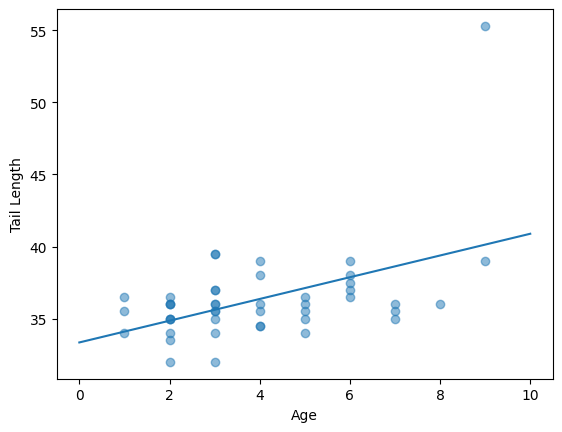

In [10]:
# Make the design matrix using np.c_ 
# y = ...
# X =  np.c_[...]
def fit_and_plot(lossfcn):
    y = possum_data['tailL']
    num_samples = y.shape[0]
    X = np.c_[np.ones(num_samples), possum_data['age']]

    # Call your fitting function 
    estimated_betas, R2 = linearModelFit(X, y, lossfcn)

    # Create the scatter plot (see question 1.1)
    plt.scatter(possum_data['age'], possum_data['tailL'], alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel('Tail Length')

    # Create a new X matrix with equally space data 
    X_linspaced = np.c_[np.ones(num_samples), np.linspace(0, 10, num_samples)]

    # Add the line to the graph 
    plt.plot(X_linspaced[:, 1], linearModelPredict(estimated_betas, X_linspaced))

    # Report R2
    print(f'R2 = {R2}')

fit_and_plot(linearModelLossRSS)

## Part 2: LAD Regression

### Question 2.1:  /13 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [11]:
def linearModelLossLAD(b,X,y):
    yp = linearModelPredict(b, X)
    residual = y - yp 
    sum_abs_dev = np.sum(np.abs(residual))
    grad = - np.sign(residual) @ X
    return (sum_abs_dev,grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

loss, gradient = linearModelLossLAD(b, X, y)
print(loss, gradient)

2.0 [-1. -1.]


### Question 2.2: /8 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



R2 = 0.12923024435209518


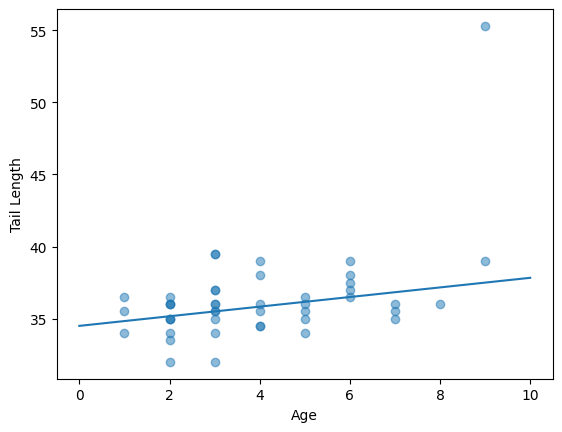

In [12]:
fit_and_plot(linearModelLossLAD)

Written answer: The LAD fit does not give as much weight to the outlier (9,55) as the OLS fit. The R2 value is lower, however. This is because OLS minimized the RSS, and therefore maximizes R2.  

## Part 3: OLS Regression using Sklearn
### Question 3.1: /7 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [13]:
from sklearn.linear_model import LinearRegression

y = possum_data['tailL']
num_samples = y.shape[0]
X = np.c_[np.ones(num_samples), possum_data['age']]

model = LinearRegression()
model.fit(X, y)
R2 = model.score(X, y)

print(R2)

0.22286587947604108


**Written answer**: The rsquared values for both are similar. This is because the LinearRegression class in sklearn also uses the method of ordinary least squares to fit its linear regression model.

## Part 4: A new loss function
### Question 4.1: /4 points

Assume that the following function has been proposed to you to use as a new loss function for regression:

$$L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$$

What do you think about this new loss function, would you accept it? Please, explain.

** Answer in this cell **

I wouldn't accept this new loss function. Because the residuals are cubed, large negative residuals would actually decrease the cost instead of increasing it, hence minimizing $L_3$ would mean maximizing the predictions $\hat y_i$ without bounds.

Apart from this, the non-convexity of the cubic function would make optimization more difficult, and the increased sensitivity to outliers (compared to $L_1$ or $L_2$) would make the model less robust.



### Question 4.2: /8 points

Regardless of your answer to Question 4.1, taking $\: \hat{\mathbf{y}} = \mathbf{X^2} \hat{\beta}\:$ as your functional form for regression, use your knowledge of calculus to calculate the gradient of $\: L_3(\hat{\beta}).$ Type your answer (including the intermediate steps) in the cell below in Latex format. Note that $\hat{\beta}=[\beta_0, \beta_1]^T$, and $\mathbf{X}$ is an $n$-by-$2$ matrix.

Since $\bm {\hat y} = \bm X^2 \bm {\hat \beta}$,

$\frac{\partial L_3}{\partial \bm \beta} = \sum_{i = 1}^n \frac{\partial}{\partial \bm \beta}(y_i - \hat y_i)^3 = - 3\sum_{i = 1}^n(y - \hat y_i)^2 \cdot \bm X^2$

so $\nabla L_3(\bm \beta) = \langle -3 \sum_{i = 1}^n (y_i - (b_0 + b_1x_i))^2, -3 \sum_{i = 1}^n (y_i - (b_0 + b_1x_1))^2 x_i \rangle$.